> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [ ]:
import numpy as np

### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [ ]:
def corr2d(X: np.array, K: np.array) -> np.array:
    # no padding for now and assume stride = 1

    X_height, X_width = X.shape
    K_height, K_width = K.shape



    ft_map_height= X_height - K_height +1
    ft_map_width =  X_width - K_width +1

    #define feature map

    ft_map = np.zeros((ft_map_height, ft_map_width), dtype=np.float32)

    #dot product of X and filter array and run it all over the X

    for i in range(ft_map_height):
      for j in range(ft_map_width):
        ft_map[i,j] = np.dot(X[i:i+K_height, j:j+ K_width].flatten(), K.flatten())
    return ft_map


In [ ]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer

[[19. 25.]
 [37. 43.]]


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (output_h, output_w).

- hint : Use the above corr2d function and read about np.stack

In [ ]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array: 
    # write a function for this task
    
    X_channel, X_height, X_width = X.shape
    K_channel, K_height, K_width = K.shape
    

    ft_map_height = X_height - K_height +1
    ft_map_width = X_width - K_width +1

    ft_map = np.zeros((ft_map_height, ft_map_width), dtype = np.float32)

    for k in range(X_channel):
      ft_map = np.sum((ft_map, corr2d(X[k], K[k])), axis = 0)
    return ft_map
     

In [ ]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 

print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
print(corr2d_multiple_input_channels(new_X, new_K))
# calculate the output by hand and then check whether you get the same answer
# answer should be a 2 dim np array : (output_height, output_width) 

new_X.shape = (3, 3, 3), new_K.shape = (3, 2, 2)
[[119. 149.]
 [209. 239.]]


### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [ ]:
def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
    # X -> (num_in_channels, n_h, n_w)
    num_in_channels, n_h, n_w = X.shape
    # K -> (num_out_channels, num_in_channels, k_h, k_w)
    num_out_channels, num_in_channels, k_h, k_w = K.shape
    # output -> (num_out_channels, o_h, o_w)
    

    o_h = n_h - k_h +1
    o_w = n_w - k_w +1

    output = np.zeros((num_out_channels, o_h, o_w), dtype= np.float32)

    for i in range(num_out_channels):
      # for j in range(num_in_channels):
        output[i] = np.sum((output, corr2d_multiple_input_channels(X, K[i] )), axis = 0)
    return output

In [ ]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")
print(new_x, '\n',my_K)

print(corr2d_multi_in_out(new_X, my_K)) # cross check the calculation

my_K.shape = (4, 3, 2, 2)
[[[ 692.  884.]
  [1268. 1460.]]

 [[ 692.  884.]
  [1268. 1460.]]

 [[ 692.  884.]
  [1268. 1460.]]

 [[ 692.  884.]
  [1268. 1460.]]]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)

Ans: Larger stride decreases overlapping which takes lesser memory and it makes processing of output easier due to less number of weights.

Larger stride reduces size of feature map enables us to do detect broader patterns because a small region of input is representing a large region of input.

### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kerenl_size=(1, 2), bias=False)

In [ ]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [ ]:
K = np.array([[1.0, -1.0]], dtype=np.float32) # kernel, you need to learn this using a model
print(K)
Y = corr2d(X, K) 
print(Y)

[[ 1. -1.]]
[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [ ]:
X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [ ]:
def max_pool2d(X: np.array, K: tuple) -> np.array:
    # write a function for this job

    X_height, X_width = X.shape
    K_height = K[0]
    K_width = K[1]



    max_pool_height= X_height - K_height +1
    max_pool_width =  X_width - K_width +1


    max_pool_layer = np.zeros((max_pool_height, max_pool_width), dtype=np.float32)


    for i in range(max_pool_height):
      for j in range(max_pool_width):
         max_pool_layer[i,j] = np.max(X[i:i+K_height, j:j+K_width])
    return max_pool_layer

In [ ]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
max_pool2d(X, (2, 2)) # check if the output matches with your calculation

array([[4., 5.],
       [7., 8.]], dtype=float32)

yes, it matches with my calculation

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(35000, 1)
(15000, 1)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


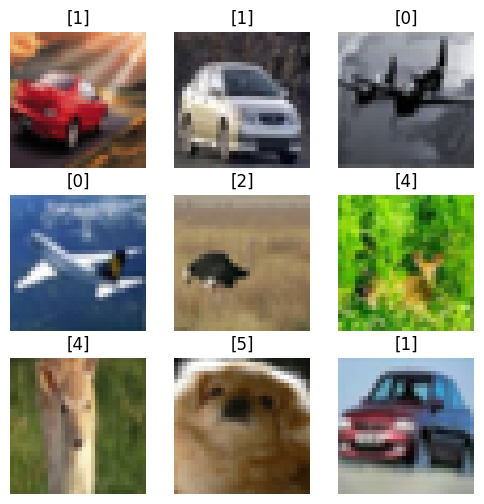

In [ ]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [ ]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

'\nSo you can probably notice here that the images are 3D(coloured) but still \nnot of great quality ( what can you expect from 32x32 image). Also there are\ncertain other factors which makes the classification a bit tougher than the \ncases of 2D( the digit and the fashion data) you dealt before. We will try to\nunderstand the difficulties and find probable solution for them.\n'

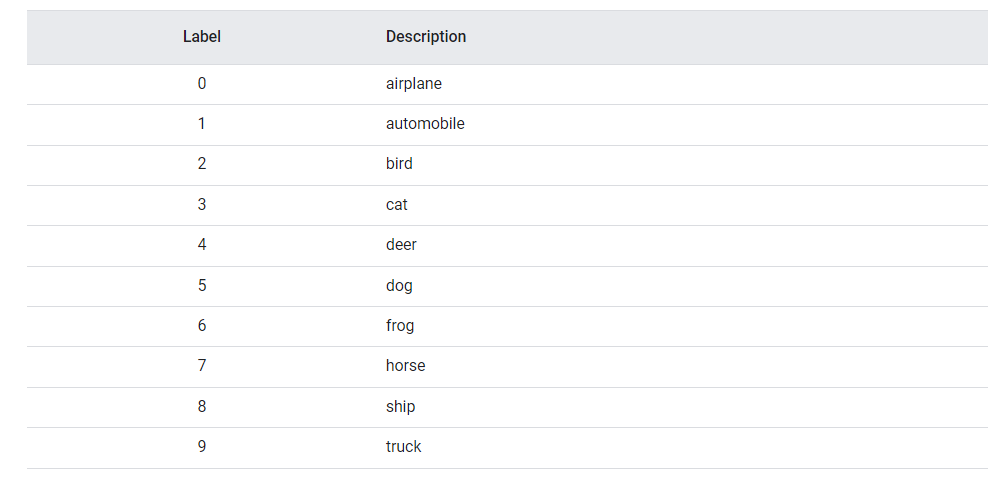

In [ ]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

'\nLets first start with the CNN model discussed in the class for digit\n classification. Notice that I have changed the input shape for this usecase.\n Earlier it was (28,28,1) for the digit dataset.\n'

In [ ]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]

Answer: Adam parameter is a pre defined function in tensor flow . It automatically initialises the weights, compute gradients, and update weights.
So we don't have to do that manually it can do that automatically.2
"""

'\nExplain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]\n\nAnswer:\n'

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [48]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


875/875 [==============================] - 57s 63ms/step - loss: 2.7027 - accuracy: 0.1029 - val_loss: 2.3033 - val_accuracy: 0.0994
Epoch 2/10
875/875 [==============================] - 47s 53ms/step - loss: 2.3011 - accuracy: 0.1042 - val_loss: 2.3025 - val_accuracy: 0.0953
Epoch 3/10
875/875 [==============================] - 44s 51ms/step - loss: 2.3004 - accuracy: 0.1050 - val_loss: 2.2987 - val_accuracy: 0.0961
Epoch 4/10
875/875 [==============================] - 44s 51ms/step - loss: 2.2996 - accuracy: 0.1060 - val_loss: 2.3031 - val_accuracy: 0.0936
Epoch 5/10
875/875 [==============================] - 42s 48ms/step - loss: 2.2991 - accuracy: 0.1089 - val_loss: 2.3031 - val_accuracy: 0.1004
Epoch 6/10
875/875 [==============================] - 40s 45ms/step - loss: 2.2970 - accuracy: 0.1114 - val_loss: 2.3015 - val_accuracy: 0.1027
Epoch 7/10
875/875 [==============================] - 40s 46ms/step - loss: 2.2966 - accuracy: 0.1145 - val_loss: 2.3039 - val_accuracy: 0.0983
Epo

In [49]:
""" 
Write about validation accuracy in 100 words.

Answer: 
"""

' \nWrite about validation accuracy in 100 words.\n\nAnswer: \n'

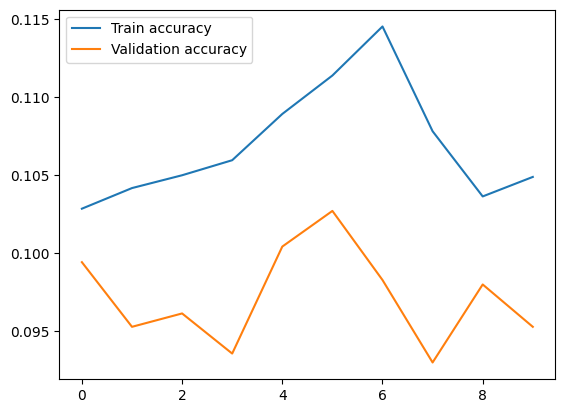

In [50]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [51]:
"""
What do you think is happening? Is the model training or not?
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively
"""

'\nWhat do you think is happening? Is the model training or not?\n You can see that both the training and validation accuracy are\n just roaming around 0.1. \n One reason for this can be our model architecture. We had 26 filters\n in our first layer and 16 filters in our next layer. This funnel down approach\n works for dense layers but for Conv layers( which are good at feature extraction)\n we want them to extract more and more features.\n\n So lets change that to funne up --> 16 and 32 in the layers respectively\n'

In [52]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [53]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
875/875 [==============================] - 34s 38ms/step - loss: 2.5573 - accuracy: 0.2142 - val_loss: 1.7863 - val_accuracy: 0.3406
Epoch 2/20
875/875 [==============================] - 34s 39ms/step - loss: 1.7139 - accuracy: 0.3808 - val_loss: 1.6303 - val_accuracy: 0.4061
Epoch 3/20
875/875 [==============================] - 34s 39ms/step - loss: 1.5244 - accuracy: 0.4527 - val_loss: 1.5655 - val_accuracy: 0.4431
Epoch 4/20
637/875 [====================>.........] - ETA: 8s - loss: 1.4124 - accuracy: 0.4946

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
Did our model improved??
Are we done with the job?
What is happening after 5( roughly ) epochs? Why is there a gap between
training and validation accuracy?

Our training accuracy reached to 0.73( and still increasing ) but 
the validation accuracy seems to stagnate at 0.52.

Is our model overfitting on the training data so much that it can't work well 
on unseen data.
"""

In [ ]:
"""
How are we gonna tackel this problem?
Well, we will see that in next part of this assignment.
Till then lets learn about about overfitting.
"""

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

In [ ]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

In [ ]:
"""
Question: What is overfitting and underfitting below ( atleast 200 words )

Answer: Underfitting: This is the condition when our model is not able to generalize its predictions over testing data. It performs well for training
data. It happens when we have less size dataset and our model is very simple and has not much non-linearity. Due to less size of dataset,we get a 
very simple curve which give very wrong predictions.So it fails completely for new data.Tbe problem of underfitting can be overcome by using a larger 
data set and if we introduce a little complexity in our dataset so that we get a better curve which can generalize our data. Increasing number of
epochs can also help as updating weights can help in getting better result every time.

Overfitting: The problem is same as in underfitting, an overfitting model cannot generalize its predictions over testing data. It performs very well
over training data and we get a very high accuracy. Our model trains itself so well on training data that it can only give good result on training data.
But the reasons are slightly opposite of underfitting. In this,  model becomes very complex. So it we can use linear algorithms to reduce its complexity.
We can increase size of training data so that it can get better patterns. We can use dropout method to decrease the complexity and each time we give
data so that our model don't just memorize our training data and can generalize the model to unseen data/testing data.


"""

In [ ]:
"""
Question: What are regularization techniques in machine learning?(200 words)

Answer: Dropout:  we drop some neurons in our model(by updating their weights to zero) and now we train our model based on the remaining neurons.
 And in each iterations it changes the neurons. So it basically means that now our model is being trained using new data set each time which helps
to generalize when we use testing data. It also helps in increasing in computation speed as we drop neurons so their weights are zero.

Data Argumentation: When we have small dataset or we want our model to be of high accuracy then we can data argumentation. In this, we increases our 
dataset by modifying our dataset. Like if we a have then we can do modification as different orientation, stretching image, compressing the image,
different positions etc. By this our model trains basically trains itself on same image but differnt patterns so it will generalize well. 

We can also do L1 normalization, L2 normaliztion, and changing the size of training data set, changing the number of epochs, chaning the learning 
rate, batch normalization.
"""

In [ ]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)

Answer: We add dropout layer to overcome overfitting in our model. Our model overfits because it sees same data during epochs so it memorizes that 
data and so it can give best results only for that data. But when we add dropout layer what we do is, we drop some neurons in our model(by updating
their weights to zero) and now we train our model based on the remaining neurons. And in each iterations it changes the neurons. So it basically means that now our model is 
being trained using new data set each time which helps to generalize when we use testing data. But when we run our model on testing data, it 
removes that dropout layer and our model now consider each neuron. 
It also helps in increasing in computation speed as we drop neurons so their weights are zero. So we have now decreased the complexity of our model.
So adding a dropout layer is a good regulariztion technique.
"""

In [ ]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )

Answer: In L1 normalizatino we add a penality term in our loss function which is absolute. It basically tries to minimize the weights to zero of 
less significant features in our model. It helps to overcome overfitting in our model.

Loss=Error(Y−Y_hat)+λ sigma(1 to n) |w(i)|


"""

In [ ]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )

Answer: In L1 normalizatino we add a penality term in our loss function which is squared value. It basically tries to minimize the weights to zero of 
less significant features in our model. It also helps to overcome overfitting in our model.

Loss=Error(Y−Y_hat)+λ sigma(1 to n) w^2(i)
"""

In [ ]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )

Answer: Data Argumentation: When we have small dataset or we want our model to be of high accuracy then we can data argumentation. In this, we 
increases our dataset by modifying our dataset. Like if we a have then we can do modification as different orientation, stretching image, compressing the image,
different positions, image flipping, changing color etc. We can increase our data by 4 or 5 times by using these techniques.
 So now what we are doing is training our model on a larger data set but we know that we have used the same image 4 or 5 times, so by this our model
 will able to generalize well as it scanning the same image but in different pattern. so it can help in reducing overfitting also.
 
"""